# FAKE NEWS (PIC)


## DATASET
https://www.kaggle.com/datasets/javierespaol/spanish-political-news-dataset

In [1]:
# !pip install pandas scikit-learn nltk
# !pip install --upgrade numpy pandas

In [2]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santiagotene/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
# # Load the dataset
# Load the dataset
#file_url = "datasets_completo.csv"
#https://drive.google.com/file/d/1gdoflIemdhn33jFVetMqojvxtSNtH06K/view?usp=drive_link
#file_url = "https://drive.google.com/uc?id=1gdoflIemdhn33jFVetMqojvxtSNtH06K"
# Leer el archivo CSV desde la URL
#data = pd.read_csv(file_url, sep=';')
data = pd.read_csv("datasets_Completo/DatasetFinal.csv", sep=';')

data

,Label,Titulo,Descripcion,Fecha
0,1,Moreno intenta apaciguar el flanco sanitario m...,Moreno intenta apaciguar el flanco sanitario m...,2019-10-31
1,1,La Abogacía del Estado se retira como acusació...,La Abogacía del Estado se retira como acusació...,2023-07-05
2,0,Las promesas incumplidas de Pablo Echenique en...,Las promesas incumplidas de Pablo Echenique en...,2023-09-15
3,1,Sánchez defiende 'resolver el problema' de la ...,Sánchez defiende 'resolver el problema' de la ...,2021-05-24
4,1,Ian Gibson cierra la lista electoral de la con...,Ian Gibson cierra la lista electoral de la con...,2023-11-14
...,...,...,...,...
82350,0,Campaña por la Educación,Campaña busca mejorar el acceso a la educación...,2021-08-10
82351,0,Nueva Ley Económica,Campaña busca mejorar el acceso a la educación...,2023-01-01
82352,1,Debate Electoral,Nueva propuesta legislativa en favor de los ci...,2023-08-03
82353,1,Reforma Constitucional,Se discute en la Asamblea una reforma importante.,2023-11-18


Distribución de clases:
1    45045
0    37310
Name: Label, dtype: int64


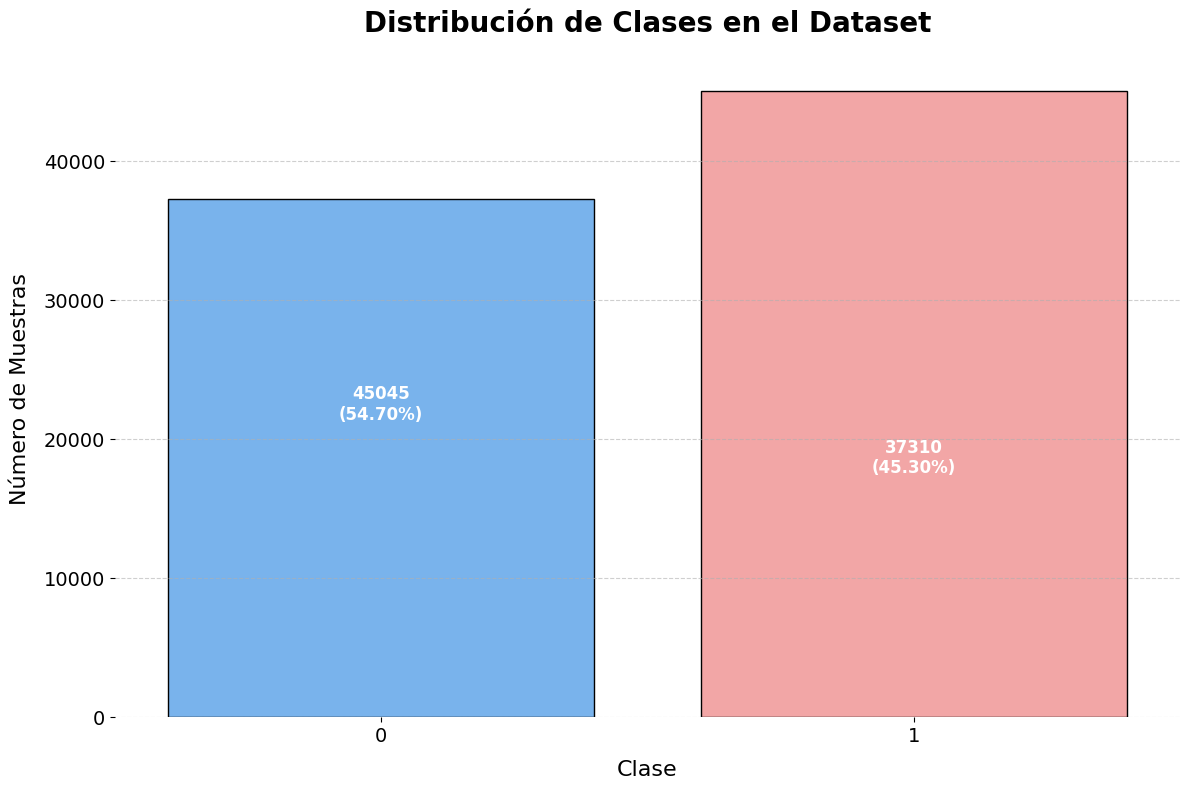

In [4]:
# Paso 3: Equilibrio de clases
# Revisar el balance de clases
import matplotlib.pyplot as plt
import seaborn as sns

print("Distribución de clases:")
class_distribution = data['Label'].value_counts()
print(class_distribution)

# Configuración de colores y proporciones
colors = ['#66b3ff', '#ff9999']
total_samples = class_distribution.sum()
proportions = class_distribution / total_samples * 100

# Crear figura
plt.figure(figsize=(12, 8))

# Gráfico de barras
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=colors, edgecolor='black')

# Añadir valores dentro de las barras
for i, (value, proportion) in enumerate(zip(class_distribution.values, proportions)):
    plt.text(i, value / 2,  # Posición en el centro de la barra
             f'{value}\n({proportion:.2f}%)',  # Texto con valor y porcentaje
             ha='center', va='center', fontsize=12, fontweight='bold', color='WHITE')

# Mejoras en el diseño
plt.title("Distribución de Clases en el Dataset", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Clase", fontsize=16, labelpad=10)
plt.ylabel("Número de Muestras", fontsize=16, labelpad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.box(False)  # Eliminar el borde del gráfico
plt.tight_layout()


# Mostrar gráfico
plt.show()


In [5]:
data

,Label,Titulo,Descripcion,Fecha
0,1,Moreno intenta apaciguar el flanco sanitario m...,Moreno intenta apaciguar el flanco sanitario m...,2019-10-31
1,1,La Abogacía del Estado se retira como acusació...,La Abogacía del Estado se retira como acusació...,2023-07-05
2,0,Las promesas incumplidas de Pablo Echenique en...,Las promesas incumplidas de Pablo Echenique en...,2023-09-15
3,1,Sánchez defiende 'resolver el problema' de la ...,Sánchez defiende 'resolver el problema' de la ...,2021-05-24
4,1,Ian Gibson cierra la lista electoral de la con...,Ian Gibson cierra la lista electoral de la con...,2023-11-14
...,...,...,...,...
82350,0,Campaña por la Educación,Campaña busca mejorar el acceso a la educación...,2021-08-10
82351,0,Nueva Ley Económica,Campaña busca mejorar el acceso a la educación...,2023-01-01
82352,1,Debate Electoral,Nueva propuesta legislativa en favor de los ci...,2023-08-03
82353,1,Reforma Constitucional,Se discute en la Asamblea una reforma importante.,2023-11-18


In [6]:
# Verificar valores duplicados
duplicated_rows = data.duplicated()
print(f"Número de filas duplicadas: {duplicated_rows.sum()}")

if duplicated_rows.sum() > 0:
    print("Filas duplicadas:")
    print(data[duplicated_rows])

Número de filas duplicadas: 313
Filas duplicadas:
       Label                      Titulo  \
58439      1  Sin título Sin descripción   
58460      1  Sin título Sin descripción   
58560      1  Sin título Sin descripción   
58620      1  Sin título Sin descripción   
58634      1  Sin título Sin descripción   
...      ...                         ...   
82301      0      Reforma Constitucional   
82325      0    Campaña por la Educación   
82331      0            Debate Electoral   
82333      0       Propuesta Legislativa   
82334      1            Debate Electoral   

                                             Descripcion       Fecha  
58439                         Sin título Sin descripción  2021-07-02  
58460                         Sin título Sin descripción  2024-06-17  
58560                         Sin título Sin descripción  2024-01-13  
58620                         Sin título Sin descripción  2023-06-01  
58634                         Sin título Sin descripción  2020-11-

In [7]:
# Eliminar duplicados
data = data.drop_duplicates()

In [8]:
# Verificar valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

rows_with_missing = data.isnull().any(axis=1).sum()
print(f"Número de filas con valores faltantes: {rows_with_missing}")

data = data.dropna()

Valores faltantes por columna:
Label          0
Titulo         1
Descripcion    0
Fecha          0
dtype: int64
Número de filas con valores faltantes: 1


In [9]:
# Verificar valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
Label          0
Titulo         0
Descripcion    0
Fecha          0
dtype: int64


In [10]:
# Check if there are any NaN values in X_description
print(data['Descripcion'].isna().sum())


0


In [11]:
# Eliminar filas donde 'Descripcion' o 'Titulo' tengan valores NaN
data = data.dropna(subset=['Descripcion', 'Titulo'])

# Separar en características (X) y etiquetas (y)
X_title = data['Titulo']
X_description = data['Descripcion']
y = data['Label']

# Verificar que ya no haya valores NaN
print(X_description.isna().sum())  # Debería imprimir 0
print(X_title.isna().sum())        # Debería imprimir 0


0
0


In [12]:
data

,Label,Titulo,Descripcion,Fecha
0,1,Moreno intenta apaciguar el flanco sanitario m...,Moreno intenta apaciguar el flanco sanitario m...,2019-10-31
1,1,La Abogacía del Estado se retira como acusació...,La Abogacía del Estado se retira como acusació...,2023-07-05
2,0,Las promesas incumplidas de Pablo Echenique en...,Las promesas incumplidas de Pablo Echenique en...,2023-09-15
3,1,Sánchez defiende 'resolver el problema' de la ...,Sánchez defiende 'resolver el problema' de la ...,2021-05-24
4,1,Ian Gibson cierra la lista electoral de la con...,Ian Gibson cierra la lista electoral de la con...,2023-11-14
...,...,...,...,...
82350,0,Campaña por la Educación,Campaña busca mejorar el acceso a la educación...,2021-08-10
82351,0,Nueva Ley Económica,Campaña busca mejorar el acceso a la educación...,2023-01-01
82352,1,Debate Electoral,Nueva propuesta legislativa en favor de los ci...,2023-08-03
82353,1,Reforma Constitucional,Se discute en la Asamblea una reforma importante.,2023-11-18


In [13]:
print(data.dtypes)

Label           int64
Titulo         object
Descripcion    object
Fecha          object
dtype: object


In [14]:
data = data[~data['Descripcion'].isin(['Sin descripción']) &
            ~data['Titulo'].isin(['Sin título']) &
            ~data['Fecha'].isin(['Sin fecha'])]

data

,Label,Titulo,Descripcion,Fecha
0,1,Moreno intenta apaciguar el flanco sanitario m...,Moreno intenta apaciguar el flanco sanitario m...,2019-10-31
1,1,La Abogacía del Estado se retira como acusació...,La Abogacía del Estado se retira como acusació...,2023-07-05
2,0,Las promesas incumplidas de Pablo Echenique en...,Las promesas incumplidas de Pablo Echenique en...,2023-09-15
3,1,Sánchez defiende 'resolver el problema' de la ...,Sánchez defiende 'resolver el problema' de la ...,2021-05-24
4,1,Ian Gibson cierra la lista electoral de la con...,Ian Gibson cierra la lista electoral de la con...,2023-11-14
...,...,...,...,...
82350,0,Campaña por la Educación,Campaña busca mejorar el acceso a la educación...,2021-08-10
82351,0,Nueva Ley Económica,Campaña busca mejorar el acceso a la educación...,2023-01-01
82352,1,Debate Electoral,Nueva propuesta legislativa en favor de los ci...,2023-08-03
82353,1,Reforma Constitucional,Se discute en la Asamblea una reforma importante.,2023-11-18


In [15]:

from bs4 import BeautifulSoup

def limpiar_html(texto_html):
    soup = BeautifulSoup(texto_html, 'html.parser')
    texto_limpio = soup.get_text() 
    return texto_limpio
    
data['Descripcion'] = data['Descripcion'].apply(limpiar_html)
data['Titulo'] = data['Titulo'].apply(limpiar_html)

data


/var/folders/58/z6k1n41n121gw5716l7n2jbm0000gn/T/ipykernel_68506/2620101614.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(texto_html, 'html.parser')


,Label,Titulo,Descripcion,Fecha
0,1,Moreno intenta apaciguar el flanco sanitario m...,Moreno intenta apaciguar el flanco sanitario m...,2019-10-31
1,1,La Abogacía del Estado se retira como acusació...,La Abogacía del Estado se retira como acusació...,2023-07-05
2,0,Las promesas incumplidas de Pablo Echenique en...,Las promesas incumplidas de Pablo Echenique en...,2023-09-15
3,1,Sánchez defiende 'resolver el problema' de la ...,Sánchez defiende 'resolver el problema' de la ...,2021-05-24
4,1,Ian Gibson cierra la lista electoral de la con...,Ian Gibson cierra la lista electoral de la con...,2023-11-14
...,...,...,...,...
82350,0,Campaña por la Educación,Campaña busca mejorar el acceso a la educación...,2021-08-10
82351,0,Nueva Ley Económica,Campaña busca mejorar el acceso a la educación...,2023-01-01
82352,1,Debate Electoral,Nueva propuesta legislativa en favor de los ci...,2023-08-03
82353,1,Reforma Constitucional,Se discute en la Asamblea una reforma importante.,2023-11-18


In [16]:
data['Titulo'] = data['Titulo'].str.replace('»', '', regex=False).str.replace('«', '', regex=False)
data['Descripcion'] = data['Descripcion'].str.replace('»', '', regex=False).str.replace('«', '', regex=False)
data['Descripcion'] = data['Descripcion'].str.replace('[…]', '', regex=False)

data

,Label,Titulo,Descripcion,Fecha
0,1,Moreno intenta apaciguar el flanco sanitario m...,Moreno intenta apaciguar el flanco sanitario m...,2019-10-31
1,1,La Abogacía del Estado se retira como acusació...,La Abogacía del Estado se retira como acusació...,2023-07-05
2,0,Las promesas incumplidas de Pablo Echenique en...,Las promesas incumplidas de Pablo Echenique en...,2023-09-15
3,1,Sánchez defiende 'resolver el problema' de la ...,Sánchez defiende 'resolver el problema' de la ...,2021-05-24
4,1,Ian Gibson cierra la lista electoral de la con...,Ian Gibson cierra la lista electoral de la con...,2023-11-14
...,...,...,...,...
82350,0,Campaña por la Educación,Campaña busca mejorar el acceso a la educación...,2021-08-10
82351,0,Nueva Ley Económica,Campaña busca mejorar el acceso a la educación...,2023-01-01
82352,1,Debate Electoral,Nueva propuesta legislativa en favor de los ci...,2023-08-03
82353,1,Reforma Constitucional,Se discute en la Asamblea una reforma importante.,2023-11-18


In [17]:
data['Titulo']

0        Moreno intenta apaciguar el flanco sanitario m...
1        La Abogacía del Estado se retira como acusació...
2        Las promesas incumplidas de Pablo Echenique en...
3        Sánchez defiende 'resolver el problema' de la ...
4        Ian Gibson cierra la lista electoral de la con...
                               ...                        
82350                             Campaña por la Educación
82351                                  Nueva Ley Económica
82352                                     Debate Electoral
82353                               Reforma Constitucional
82354                               Reforma Constitucional
Name: Titulo, Length: 82041, dtype: object

Distribución de clases:
1    44903
0    37138
Name: Label, dtype: int64


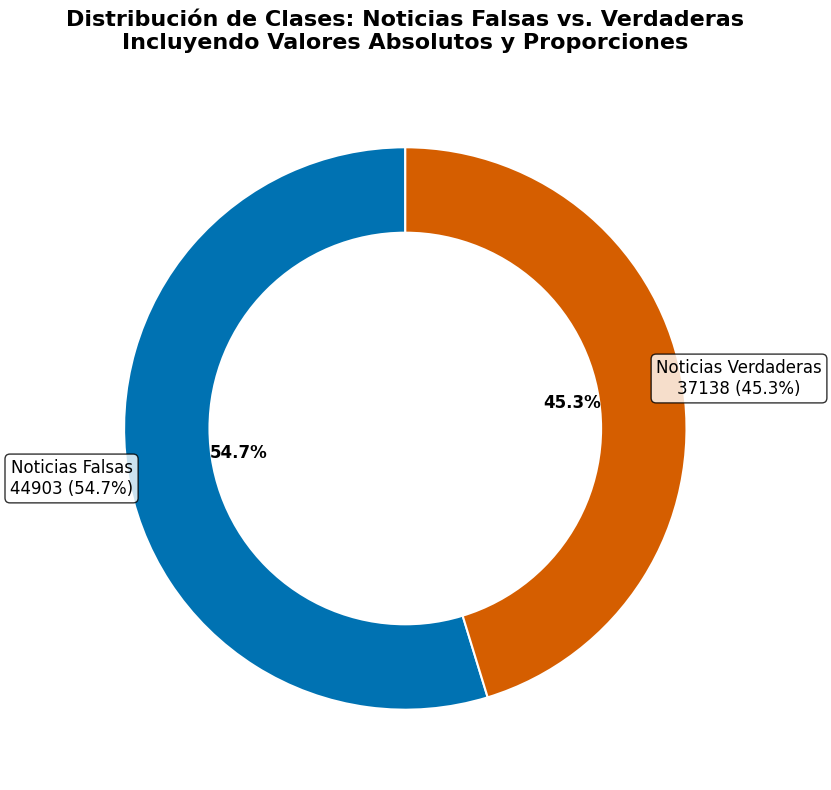

In [18]:
# Paso 3: Equilibrio de clases
# Revisar el balance de clases con un gráfico de dona mejorado
import matplotlib.pyplot as plt
import numpy as np

print("Distribución de clases:")
class_distribution = data['Label'].value_counts()
print(class_distribution)

# Configuración de colores, etiquetas y proporciones
colors = ['#0072B2', '#D55E00']  # Azul y naranja con buen contraste
labels = ['Noticias Falsas', 'Noticias Verdaderas']  # Etiquetas descriptivas
sizes = class_distribution.values
percentages = (class_distribution / class_distribution.sum()) * 100

# Crear el gráfico de dona
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    sizes, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# Añadir etiquetas externas con valores absolutos y proporciones
for i, (size, percent) in enumerate(zip(sizes, percentages)):
    angle = (wedges[i].theta2 + wedges[i].theta1) / 2
    x = 1.2 * np.cos(np.radians(angle))  # Ajustar distancia de las etiquetas
    y = 1.2 * np.sin(np.radians(angle))
    plt.text(
        x, y, f"{labels[i]}\n{size} ({percent:.1f}%)", 
        ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3')
    )

# Crear un círculo para convertirlo en gráfico de dona
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Configurar título
plt.title("Distribución de Clases: Noticias Falsas vs. Verdaderas\nIncluyendo Valores Absolutos y Proporciones", 
          fontsize=16, fontweight='bold', pad=20)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [19]:
# # Filtramos los registros donde 'Label' es igual a 0
# class_0_data = data[data['Label'] == 0]

# # Seleccionamos aleatoriamente 5000 registros de la clase 0
# class_0_sample = class_0_data.sample(n=5000, random_state=42)

# # Eliminamos estos registros del DataFrame original
# data = data.drop(class_0_sample.index)

# data

In [20]:
from sklearn.utils import resample

print("Distribución de clases antes del submuestreo:")
print(data['Label'].value_counts())

mayoritaria = data[data['Label'] == 1]
minoritaria = data[data['Label'] == 0]

mayoritaria_submuestreada = resample(mayoritaria,
                                      replace=False,     
                                      n_samples=len(minoritaria), 
                                      random_state=42) 

data_balanceada = pd.concat([mayoritaria_submuestreada, minoritaria])

data_balanceada = data_balanceada.sample(frac=1, random_state=42).reset_index(drop=True)

print("Distribución de clases después del submuestreo:")
print(data_balanceada['Label'].value_counts())

data = data_balanceada



Distribución de clases antes del submuestreo:
1    44903
0    37138
Name: Label, dtype: int64
Distribución de clases después del submuestreo:
0    37138
1    37138
Name: Label, dtype: int64


In [21]:
data

,Label,Titulo,Descripcion,Fecha
0,0,Un grupo de apoyo a Xavier Domènech cuelga una...,Un grupo de apoyo a Xavier Domènech cuelga una...,2023-10-31
1,1,Antonio Maíllo o el disfrute de una campaña el...,Antonio Maíllo o el disfrute de una campaña el...,2021-12-25
2,1,"El Gobierno, dispuesto a cubrir la baja labora...","El Gobierno, dispuesto a cubrir la baja labora...",2020-06-01
3,1,"La tragedia de Zaldibar, punta del iceberg de ...","La tragedia de Zaldibar, punta del iceberg de ...",2018-08-17
4,0,Marlaska rearma la lucha policial contra la vi...,Marlaska rearma la lucha policial contra la vi...,2024-05-18
...,...,...,...,...
74271,0,Inma Nieto pierde las primarias de PNC frente ...,Inma Nieto pierde las primarias de PNC frente ...,2024-12-28
74272,1,El Tribunal Constitucional anula la consulta i...,El Tribunal Constitucional anula la consulta i...,2019-06-18
74273,0,"PP, 'decepcionado' con Cristina Narbona, confí...","PP, 'decepcionado' con Cristina Narbona, confí...",2024-07-08
74274,1,El ministro Yang Jiechi elogia el modelo de di...,El ministro Yang Jiechi elogia el modelo de di...,2022-03-08


Distribución de clases:
0    37138
1    37138
Name: Label, dtype: int64


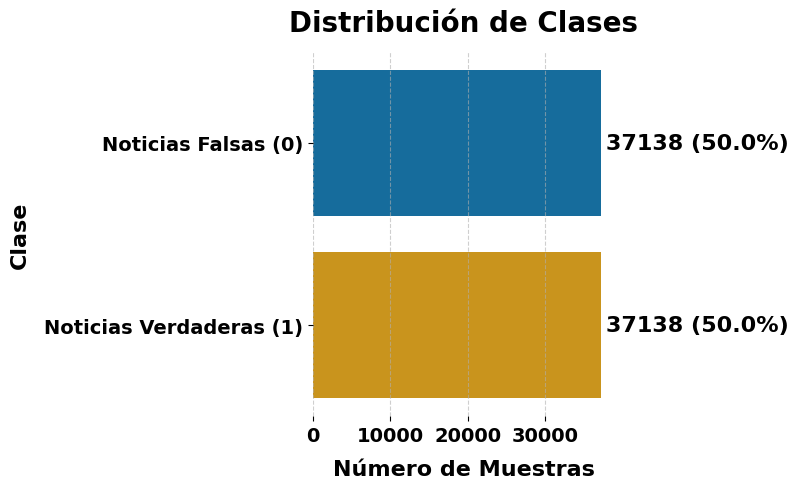

In [22]:
# Verificar el balance de clases
print("Distribución de clases:")
class_distribution = data['Label'].value_counts()
print(class_distribution)

# Etiquetas descriptivas con valores de clase
class_names = ['Noticias Falsas (0)', 'Noticias Verdaderas (1)']  # Cambiar nombres de las clases
class_distribution.index = class_names

# Calcular proporciones
total_samples = class_distribution.sum()
percentages = (class_distribution / total_samples) * 100

# Crear gráfico de barras horizontal más pequeño
plt.figure(figsize=(8, 5))  # Gráfico más pequeño
sns.barplot(x=class_distribution.values, y=class_distribution.index, 
            palette=['#0072B2', '#E69F00', '#009E73'], orient='h')

# Añadir etiquetas con valores absolutos y porcentajes
for i, (value, percent) in enumerate(zip(class_distribution.values, percentages)):
    plt.text(value + total_samples * 0.01, i, f"{value} ({percent:.1f}%)", 
             va='center', fontsize=16, fontweight='bold', color='black')  # Letras más grandes

# Mejoras en el diseño del gráfico
plt.title("Distribución de Clases", 
          fontsize=20, fontweight='bold', pad=15)  # Título grande
plt.xlabel("Número de Muestras", fontsize=16, fontweight='bold', labelpad=10)
plt.ylabel("Clase", fontsize=16, fontweight='bold', labelpad=10)
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.box(False)  # Eliminar bordes externos
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [23]:
data

,Label,Titulo,Descripcion,Fecha
0,0,Un grupo de apoyo a Xavier Domènech cuelga una...,Un grupo de apoyo a Xavier Domènech cuelga una...,2023-10-31
1,1,Antonio Maíllo o el disfrute de una campaña el...,Antonio Maíllo o el disfrute de una campaña el...,2021-12-25
2,1,"El Gobierno, dispuesto a cubrir la baja labora...","El Gobierno, dispuesto a cubrir la baja labora...",2020-06-01
3,1,"La tragedia de Zaldibar, punta del iceberg de ...","La tragedia de Zaldibar, punta del iceberg de ...",2018-08-17
4,0,Marlaska rearma la lucha policial contra la vi...,Marlaska rearma la lucha policial contra la vi...,2024-05-18
...,...,...,...,...
74271,0,Inma Nieto pierde las primarias de PNC frente ...,Inma Nieto pierde las primarias de PNC frente ...,2024-12-28
74272,1,El Tribunal Constitucional anula la consulta i...,El Tribunal Constitucional anula la consulta i...,2019-06-18
74273,0,"PP, 'decepcionado' con Cristina Narbona, confí...","PP, 'decepcionado' con Cristina Narbona, confí...",2024-07-08
74274,1,El ministro Yang Jiechi elogia el modelo de di...,El ministro Yang Jiechi elogia el modelo de di...,2022-03-08


In [24]:
#!python -m spacy download es_core_news_sm


import spacy
nlp = spacy.load('es_core_news_sm')


In [25]:
data

,Label,Titulo,Descripcion,Fecha
0,0,Un grupo de apoyo a Xavier Domènech cuelga una...,Un grupo de apoyo a Xavier Domènech cuelga una...,2023-10-31
1,1,Antonio Maíllo o el disfrute de una campaña el...,Antonio Maíllo o el disfrute de una campaña el...,2021-12-25
2,1,"El Gobierno, dispuesto a cubrir la baja labora...","El Gobierno, dispuesto a cubrir la baja labora...",2020-06-01
3,1,"La tragedia de Zaldibar, punta del iceberg de ...","La tragedia de Zaldibar, punta del iceberg de ...",2018-08-17
4,0,Marlaska rearma la lucha policial contra la vi...,Marlaska rearma la lucha policial contra la vi...,2024-05-18
...,...,...,...,...
74271,0,Inma Nieto pierde las primarias de PNC frente ...,Inma Nieto pierde las primarias de PNC frente ...,2024-12-28
74272,1,El Tribunal Constitucional anula la consulta i...,El Tribunal Constitucional anula la consulta i...,2019-06-18
74273,0,"PP, 'decepcionado' con Cristina Narbona, confí...","PP, 'decepcionado' con Cristina Narbona, confí...",2024-07-08
74274,1,El ministro Yang Jiechi elogia el modelo de di...,El ministro Yang Jiechi elogia el modelo de di...,2022-03-08


In [26]:
import pandas as pd
import re

# Supongamos que 'data' es tu DataFrame.
# data = pd.read_csv('archivo.csv')

pattern = r'[^a-zA-Z0-9áéíóúüñÁÉÍÓÚÜÑ\s]'

def encontrar_palabras_especiales(texto, regex_pattern=pattern):
    """
    Dada una cadena de texto, devuelve la lista de palabras
    que contienen al menos un caracter especial (según el patrón regex).
    """
    texto = str(texto)  # asegurar que sea string
    palabras = texto.split()  # separar por espacios
    # filtrar solo aquellas palabras que cumplan con la regex
    return [pal for pal in palabras if re.search(regex_pattern, pal)]

# Creamos nuevas columnas para almacenar las palabras con caracteres especiales:
data['Label_especiales'] = data['Label'].astype(str).apply(encontrar_palabras_especiales)
data['Titulo_especiales'] = data['Titulo'].astype(str).apply(encontrar_palabras_especiales)
data['Descripcion_especiales'] = data['Descripcion'].astype(str).apply(encontrar_palabras_especiales)
data['Fecha_especiales'] = data['Fecha'].astype(str).apply(encontrar_palabras_especiales)

# Si solo quieres imprimir o mostrar las "palabras con caracteres especiales",
# puedes seleccionar únicamente estas columnas:
print(data[['Label_especiales', 'Titulo_especiales', 
            'Descripcion_especiales', 'Fecha_especiales']])


      Label_especiales                                 Titulo_especiales  \
0                   []                                [Domènech, Segrià]   
1                   []                                    [“Lo, cosas”,]   
2                   []                                  [Gobierno,, 50%]   
3                   []                                       [Zaldibar,]   
4                   []                                                []   
...                ...                                               ...   
74271               []                                                []   
74272               []                                            [-, -]   
74273               []     [PP,, 'decepcionado', Narbona,, investidura,]   
74274               []                                            [-, -]   
74275               []  ['por, actos', plenaria,, “concordia”, “unidad”]   

                                  Descripcion_especiales Fecha_especiales  
0          

In [27]:
import pandas as pd
import nltk
import spacy
import re
from nltk.corpus import stopwords

# Descargar las stopwords de NLTK
nltk.download('stopwords')

# Cargar el modelo en español
nlp = spacy.load('es_core_news_sm')

def normalizar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    
    # Eliminar todos los paréntesis
    texto = re.sub(r'[()]', '', texto)
    
    # Eliminar caracteres especiales y números
    texto = re.sub(r'[^\w\s]', '', texto)
    
    #eliminar espacios extra
    texto = re.sub(r'\s+', ' ', texto).strip()
    
    # Tokenización
    tokens = nltk.word_tokenize(texto)
    
    # Eliminación de stop words
    #spanish_stopwords = set(stopwords.words('spanish'))
    #tokens = [word for word in tokens if word not in spanish_stopwords]
    
    # Unir tokens en una sola cadena
    texto_normalizado = ' '.join(tokens)
    
    return texto_normalizado

# Supongamos que tienes un DataFrame llamado `df` con columnas 'Titulo' y 'Descripcion'
# DataFrame `df` debe ser previamente definido, por ejemplo:
# data = {'Titulo': ['Ejemplo título'], 'Descripcion': ['Ejemplo descripción']}
# df = pd.DataFrame(data)

data['Titulo'] = data['Titulo'].apply(normalizar_texto)
data['Descripcion'] = data['Descripcion'].apply(normalizar_texto)



data


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santiagotene/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Label,Titulo,Descripcion,Fecha,Label_especiales,Titulo_especiales,Descripcion_especiales,Fecha_especiales
0,0,un grupo de apoyo a xavier domènech cuelga una...,un grupo de apoyo a xavier domènech cuelga una...,2023-10-31,[],"[Domènech, Segrià]","[Domènech, Segrià, Mossos.]",[2023-10-31]
1,1,antonio maíllo o el disfrute de una campaña el...,antonio maíllo o el disfrute de una campaña el...,2021-12-25,[],"[“Lo, cosas”,]","[“Lo, cosas”,]",[2021-12-25]
2,1,el gobierno dispuesto a cubrir la baja laboral...,el gobierno dispuesto a cubrir la baja laboral...,2020-06-01,[],"[Gobierno,, 50%]","[Gobierno,, 50%, marzo.]",[2020-06-01]
3,1,la tragedia de zaldibar punta del iceberg de l...,la tragedia de zaldibar punta del iceberg de l...,2018-08-17,[],"[Zaldibar,]","[Zaldibar,, desaparecidos., residuos., aumento.]",[2018-08-17]
4,0,marlaska rearma la lucha policial contra la vi...,marlaska rearma la lucha policial contra la vi...,2024-05-18,[],[],[Civil.],[2024-05-18]
...,...,...,...,...,...,...,...,...
74271,0,inma nieto pierde las primarias de pnc frente ...,inma nieto pierde las primarias de pnc frente ...,2024-12-28,[],[],"[partido., Franco.]",[2024-12-28]
74272,1,el tribunal constitucional anula la consulta i...,el tribunal constitucional anula la consulta i...,2019-06-18,[],"[-, -]","[-, -, 2017.]",[2019-06-18]
74273,0,pp decepcionado con cristina narbona confía en...,pp decepcionado con cristina narbona confía en...,2024-07-08,[],"[PP,, 'decepcionado', Narbona,, investidura,]","[PP,, 'decepcionado', Narbona,, investidura,, ...",[2024-07-08]
74274,1,el ministro yang jiechi elogia el modelo de di...,el ministro yang jiechi elogia el modelo de di...,2022-03-08,[],"[-, -]","[-, -, 1.9.2021, -, Agricultura,, Alimentación...",[2022-03-08]


In [28]:
# Buscar la palabra "ecuador" en todas las columnas
palabra = "ecuador"
resultado = data.applymap(lambda x: palabra.lower() in str(x).lower())

# Mostrar filas donde se encuentra la palabra
filas_con_palabra = data[resultado.any(axis=1)]

print("Filas que contienen la palabra 'ecuador':")
print(filas_con_palabra)

Filas que contienen la palabra 'ecuador':
       Label                                             Titulo  \
110        1  los ecuatorianos residentes en colombia sufrag...   
352        1  los obispos del ecuador piden serenidad y vale...   
394        1  nuevas causales de inadmisión y deportación de...   
397        1  envivolahora ecuador está en las urnas este 11...   
556        1  kombi violeta recorre ecuador contra la violen...   
...      ...                                                ...   
73776      1  maría elsa viteri sustituirá a correa como can...   
73987      1  quién será el próximo alcalde de valència en e...   
74054      1  el registro civil amplía los horarios para la ...   
74071      1  ecuador solicita al consejo de seguridad de la...   
74176      1  el mandatario electo guillermo lasso se reunir...   

                                             Descripcion       Fecha  \
110    los ecuatorianos residentes en colombia sufrag...  2019-07-10   
352    lo

In [29]:
data = data.dropna(subset=['Descripcion'])
print(data.isnull().sum())

Label                     0
Titulo                    0
Descripcion               0
Fecha                     0
Label_especiales          0
Titulo_especiales         0
Descripcion_especiales    0
Fecha_especiales          0
dtype: int64


In [30]:
data = data.dropna(subset=['Titulo'])
print(data.isnull().sum())

Label                     0
Titulo                    0
Descripcion               0
Fecha                     0
Label_especiales          0
Titulo_especiales         0
Descripcion_especiales    0
Fecha_especiales          0
dtype: int64


In [31]:
data

,Label,Titulo,Descripcion,Fecha,Label_especiales,Titulo_especiales,Descripcion_especiales,Fecha_especiales
0,0,un grupo de apoyo a xavier domènech cuelga una...,un grupo de apoyo a xavier domènech cuelga una...,2023-10-31,[],"[Domènech, Segrià]","[Domènech, Segrià, Mossos.]",[2023-10-31]
1,1,antonio maíllo o el disfrute de una campaña el...,antonio maíllo o el disfrute de una campaña el...,2021-12-25,[],"[“Lo, cosas”,]","[“Lo, cosas”,]",[2021-12-25]
2,1,el gobierno dispuesto a cubrir la baja laboral...,el gobierno dispuesto a cubrir la baja laboral...,2020-06-01,[],"[Gobierno,, 50%]","[Gobierno,, 50%, marzo.]",[2020-06-01]
3,1,la tragedia de zaldibar punta del iceberg de l...,la tragedia de zaldibar punta del iceberg de l...,2018-08-17,[],"[Zaldibar,]","[Zaldibar,, desaparecidos., residuos., aumento.]",[2018-08-17]
4,0,marlaska rearma la lucha policial contra la vi...,marlaska rearma la lucha policial contra la vi...,2024-05-18,[],[],[Civil.],[2024-05-18]
...,...,...,...,...,...,...,...,...
74271,0,inma nieto pierde las primarias de pnc frente ...,inma nieto pierde las primarias de pnc frente ...,2024-12-28,[],[],"[partido., Franco.]",[2024-12-28]
74272,1,el tribunal constitucional anula la consulta i...,el tribunal constitucional anula la consulta i...,2019-06-18,[],"[-, -]","[-, -, 2017.]",[2019-06-18]
74273,0,pp decepcionado con cristina narbona confía en...,pp decepcionado con cristina narbona confía en...,2024-07-08,[],"[PP,, 'decepcionado', Narbona,, investidura,]","[PP,, 'decepcionado', Narbona,, investidura,, ...",[2024-07-08]
74274,1,el ministro yang jiechi elogia el modelo de di...,el ministro yang jiechi elogia el modelo de di...,2022-03-08,[],"[-, -]","[-, -, 1.9.2021, -, Agricultura,, Alimentación...",[2022-03-08]


In [32]:

# Crear una nueva columna concatenando "Titulo" y "Descripcion"
data['Texto'] = data['Titulo'] + " " + data['Descripcion']

# Eliminar las columnas "Titulo", "Descripcion" y "Fecha"
columns_to_drop = ['Titulo', 'Descripcion', 'Fecha']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Guardar el archivo actualizado con la nueva columna
output_path = 'dataset_preOptimization.csv'  # Reemplaza con la ruta de salida
data.to_csv(output_path, sep=';', index=False)

print("Archivo actualizado guardado en:", output_path)

Archivo actualizado guardado en: dataset_preOptimization.csv


In [33]:
#data.to_csv('dataset_preOptimization.csv', sep=';', index=False)


In [34]:
import pandas as pd

# Cargar el dataset
dataset = pd.read_csv("dataset_preOptimization.csv", sep=";")

# Mezclar datos
shuffled_dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Divisiones
train_size = 0.7
val_test_size = 0.15

# Calcular índices para la división
train_end = int(len(shuffled_dataset) * train_size)
val_end = train_end + int(len(shuffled_dataset) * val_test_size)

# Dividir el dataset en conjuntos de entrenamiento, validación y prueba
train_data = shuffled_dataset[:train_end]
val_data = shuffled_dataset[train_end:val_end]
test_data = shuffled_dataset[val_end:]

# Guardar en archivos CSV
train_data.to_csv("train_data.csv", index=False, sep=";")
val_data.to_csv("val_data.csv", index=False, sep=";")
test_data.to_csv("test_data.csv", index=False, sep=";")

print("Conjuntos de datos guardados como CSV:")
print(" - train_data.csv")
print(" - val_data.csv")
print(" - test_data.csv")


Conjuntos de datos guardados como CSV:
 - train_data.csv
 - val_data.csv
 - test_data.csv


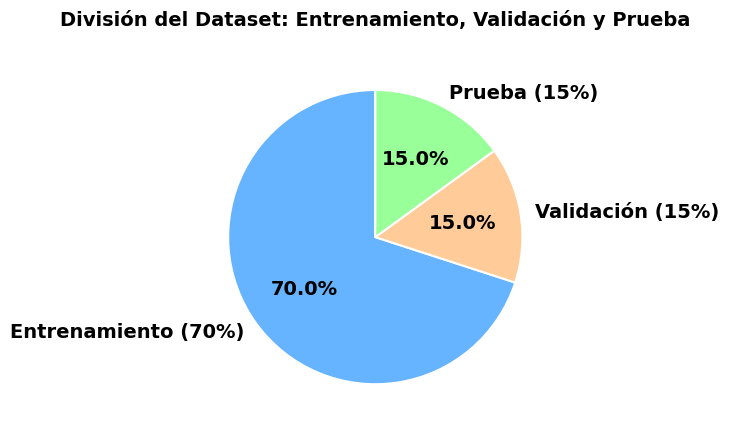

In [35]:
import matplotlib.pyplot as plt

# Porcentajes de los conjuntos
train_percentage = 70  # 70% para entrenamiento
val_percentage = 15    # 15% para validación
test_percentage = 15    # 15% para prueba

# Datos para el gráfico
sizes = [train_percentage, val_percentage, test_percentage]
labels = ['Entrenamiento (70%)', 'Validación (15%)', 'Prueba (15%)']
colors = ['#66b3ff', '#ffcc99', '#99ff99']

# Crear el gráfico de torta más pequeño
plt.figure(figsize=(7, 7))  # Tamaño más pequeño del gráfico
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=90,
    colors=colors, wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
    textprops={'fontsize': 14, 'fontweight': 'bold'}  # Letras más grandes y en negrita
)

# Añadir título
plt.title("División del Dataset: Entrenamiento, Validación y Prueba", 
          fontsize=14, fontweight='bold', pad=20)  # Título más grande y negrita

# Ajustar el diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [36]:
# Comprobar la distribución de clases
train_class_counts = train_data["Label"].value_counts()
val_class_counts = val_data["Label"].value_counts()
test_class_counts = test_data["Label"].value_counts()

# Mostrar el resumen
summary = {
    "Train Class Distribution": train_class_counts.to_dict(),
    "Validation Class Distribution": val_class_counts.to_dict(),
    "Test Class Distribution": test_class_counts.to_dict(),
}
print(summary)


{'Train Class Distribution': {0: 26096, 1: 25897}, 'Validation Class Distribution': {1: 5720, 0: 5421}, 'Test Class Distribution': {0: 5621, 1: 5521}}


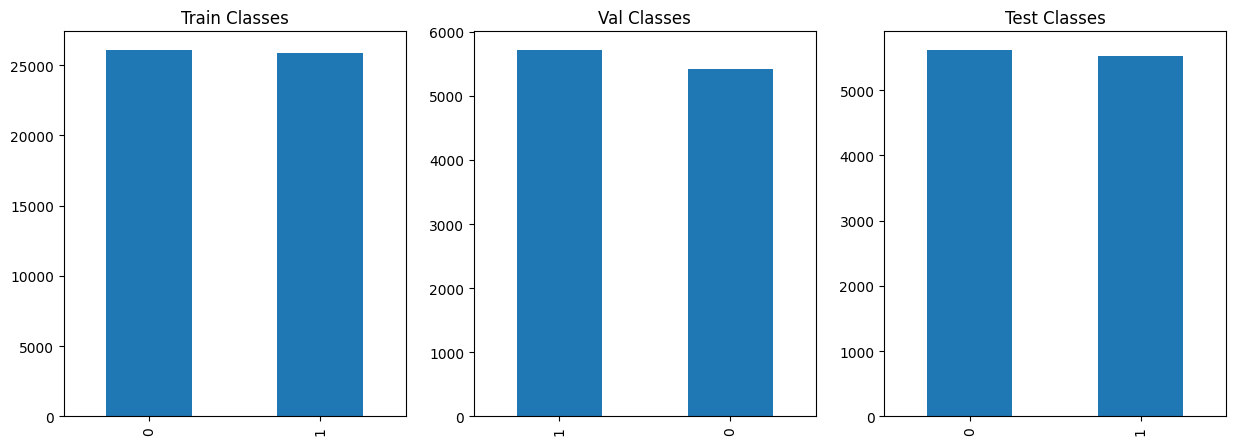

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

train_data['Label'].value_counts().plot(kind='bar', ax=axes[0], title='Train Classes')
val_data['Label'].value_counts().plot(kind='bar', ax=axes[1], title='Val Classes')
test_data['Label'].value_counts().plot(kind='bar', ax=axes[2], title='Test Classes')

plt.show()
